In [1]:
import os
import sys
import random
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab import files
import pandas as pd #2.2.3
from pandas.plotting import scatter_matrix
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=pd.errors.ChainedAssignmentError)
warnings.filterwarnings("ignore", category=FutureWarning)

drive.mount('/content/drive/')

DATA_FOLDER  = "drive/MyDrive/MO-homeworks/dataset/"
TRAIN_FOLDER = DATA_FOLDER + "train.csv"
TEST_FOLDER  = DATA_FOLDER + "test.csv"
HEAD = "ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score"
COLUMNS = HEAD.split(",")
EXTRA_COLUMNS = ['ID', 'Customer_ID', 'Name', 'SSN']

DATA_SIZE = 100000

def load_data(file):
  data = pd.read_csv(file, sep=',', header=None,  engine='python')[1:]
  data = data[:DATA_SIZE]
  data.columns = COLUMNS
  data = data.reset_index(drop=True)
  for extra_column in EXTRA_COLUMNS:
    data = data.drop(extra_column, axis=1)
  return data

def load_train():
  return load_data(TRAIN_FOLDER)

def load_test():
  # тестовые данные не содержат кредитный рейтинг (класс)
  return load_data(TEST_FOLDER)

def load_all():
  return pd.concat([load_train(), load_test()])

# ID - уникальный идентификатор записи
# Customer_ID - уникальный идентификатор человека
# Month - месяц, в котором данные были актуальны
# Name - имя человека
# Age - возраст, в котором данные были актуальны
# SSN - номер социального страхования человека
# Occupation - профессия
# Annual_Income - годовой доход
# Monthly_Inhand_Salary - месячная заработная плата
# Num_Credit_Card - количество кредитных карт
# Interest_Rate - процентная ставка по кредитной карте
# Num_of_loan - количество кредитов, взятых в банке
# Num_Of_Delayed_Payment - среднее количество дней задержки с даты платежа
# Changed_Credit_Limit - процентное изменение лимита кредитной карты
# Num_Credit_Inquires = количество запросов по кредитным картам
# Credit_Mic - классификация набора кредитов (Good, Standard, Bad)
# Outstanding_Debt = оставшаяся сумма задолженности США
# Credit_Utilization_Ratio - коэффициент использования кредитной краты
# Credit_History_Age - возраст кредитной истории
# Payment_of_min_Amont - была ли лицом уплачена только минимальная сумма
# Total_EMI_Per_Month = ежемесячный платеж по кредиту
# Amount_invested_Monthly - колько было инвестировано клиентом в месяц
# Payment_Behaviour - платежное поведение
# Monthly_Balance - ежемесячная сумма баланса клиента

# Классификация:
# Credit_Score: Good, Standard, Poor

# Задача заключается в определении кредитного рейтинга по 26 (23) параметрам

Mounted at /content/drive/


In [2]:
data = load_train()

In [3]:
data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.94496005538421,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.60935202206993,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377861869582354,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797346908844986,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833333333,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,34.66357180929323,31 Years and 6 Months,No,35.10402261040746,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,May,25,Mechanic,39628.99,3359.415833333333,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,40.565630963889205,31 Years and 7 Months,No,35.10402261040746,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,June,25,Mechanic,39628.99,3359.415833333333,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522259019116,31 Years and 8 Months,No,35.10402261040746,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,July,25,Mechanic,39628.99,3359.415833333333,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.63820798055965,31 Years and 9 Months,No,35.10402261040746,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [4]:
# Приведение всех пропущенных значений к одному символу _
data = data.replace("NA", "_")
data = data.replace("_______", "_")
data = data.replace("NM", "_")
for column in data.columns:
  # встречаются числовые значения вида "647.23_", нужно убрать подчеркивание
  for i in range(data.shape[0]):
    if type(data[column][i]) == str and data[column][i][len(data[column][i]) - 1] == "_" and len(data[column][i]) > 1:
      data[column][i] = data[column][i][0:len(data[column][i]) - 1]

data = data.convert_dtypes()
data = data.infer_objects()

In [5]:
# Приведение возраста кредитной истории в формате "1 год 2 месяца" к числовому значению

numbers = [str(i) for i in range(0, 10)]
numbers.append(" ")

for i in range(data.shape[0]):
  credit_age = data['Credit_History_Age'][i]
  credit_age_processed = ""
  if (type(credit_age) == pd._libs.missing.NAType):
    continue
  for j in range(len(credit_age)):
    if credit_age[j] in numbers:
      credit_age_processed += credit_age[j]
  credit_age_arr = list(credit_age_processed.split())
  credit_age_new = 0.0
  if len(credit_age_arr) > 0:
    credit_age_new += float(credit_age_arr[0])
  if len(credit_age_arr) > 1:
    credit_age_new += float(credit_age_arr[1]) / 12.0

  data['Credit_History_Age'][i] = str(credit_age_new)

print()

In [6]:
# приведение столбцов к нужному типу и обработка некоторых выбросов

for column in data.columns:
  try:
    data[column] = pd.to_numeric(data[column], errors='ignore')
    data[column][data[column] < 0] = 0
  except:
    pass

data['Age'][data['Age'] > 105] = 0


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Annual_Income', ylabel='Age'>,
        <Axes: xlabel='Monthly_Inhand_Salary', ylabel='Age'>,
        <Axes: xlabel='Num_Bank_Accounts', ylabel='Age'>,
        <Axes: xlabel='Num_Credit_Card', ylabel='Age'>,
        <Axes: xlabel='Interest_Rate', ylabel='Age'>,
        <Axes: xlabel='Num_of_Loan', ylabel='Age'>,
        <Axes: xlabel='Delay_from_due_date', ylabel='Age'>,
        <Axes: xlabel='Num_of_Delayed_Payment', ylabel='Age'>,
        <Axes: xlabel='Num_Credit_Inquiries', ylabel='Age'>,
        <Axes: xlabel='Outstanding_Debt', ylabel='Age'>,
        <Axes: xlabel='Credit_Utilization_Ratio', ylabel='Age'>,
        <Axes: xlabel='Credit_History_Age', ylabel='Age'>,
        <Axes: xlabel='Total_EMI_per_month', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Annual_Income'>,
        <Axes: xlabel='Annual_Income', ylabel='Annual_Income'>,
        <Axes: xlabel='Monthly_Inhand_Salary', ylabel='Annual_Income'>,
    

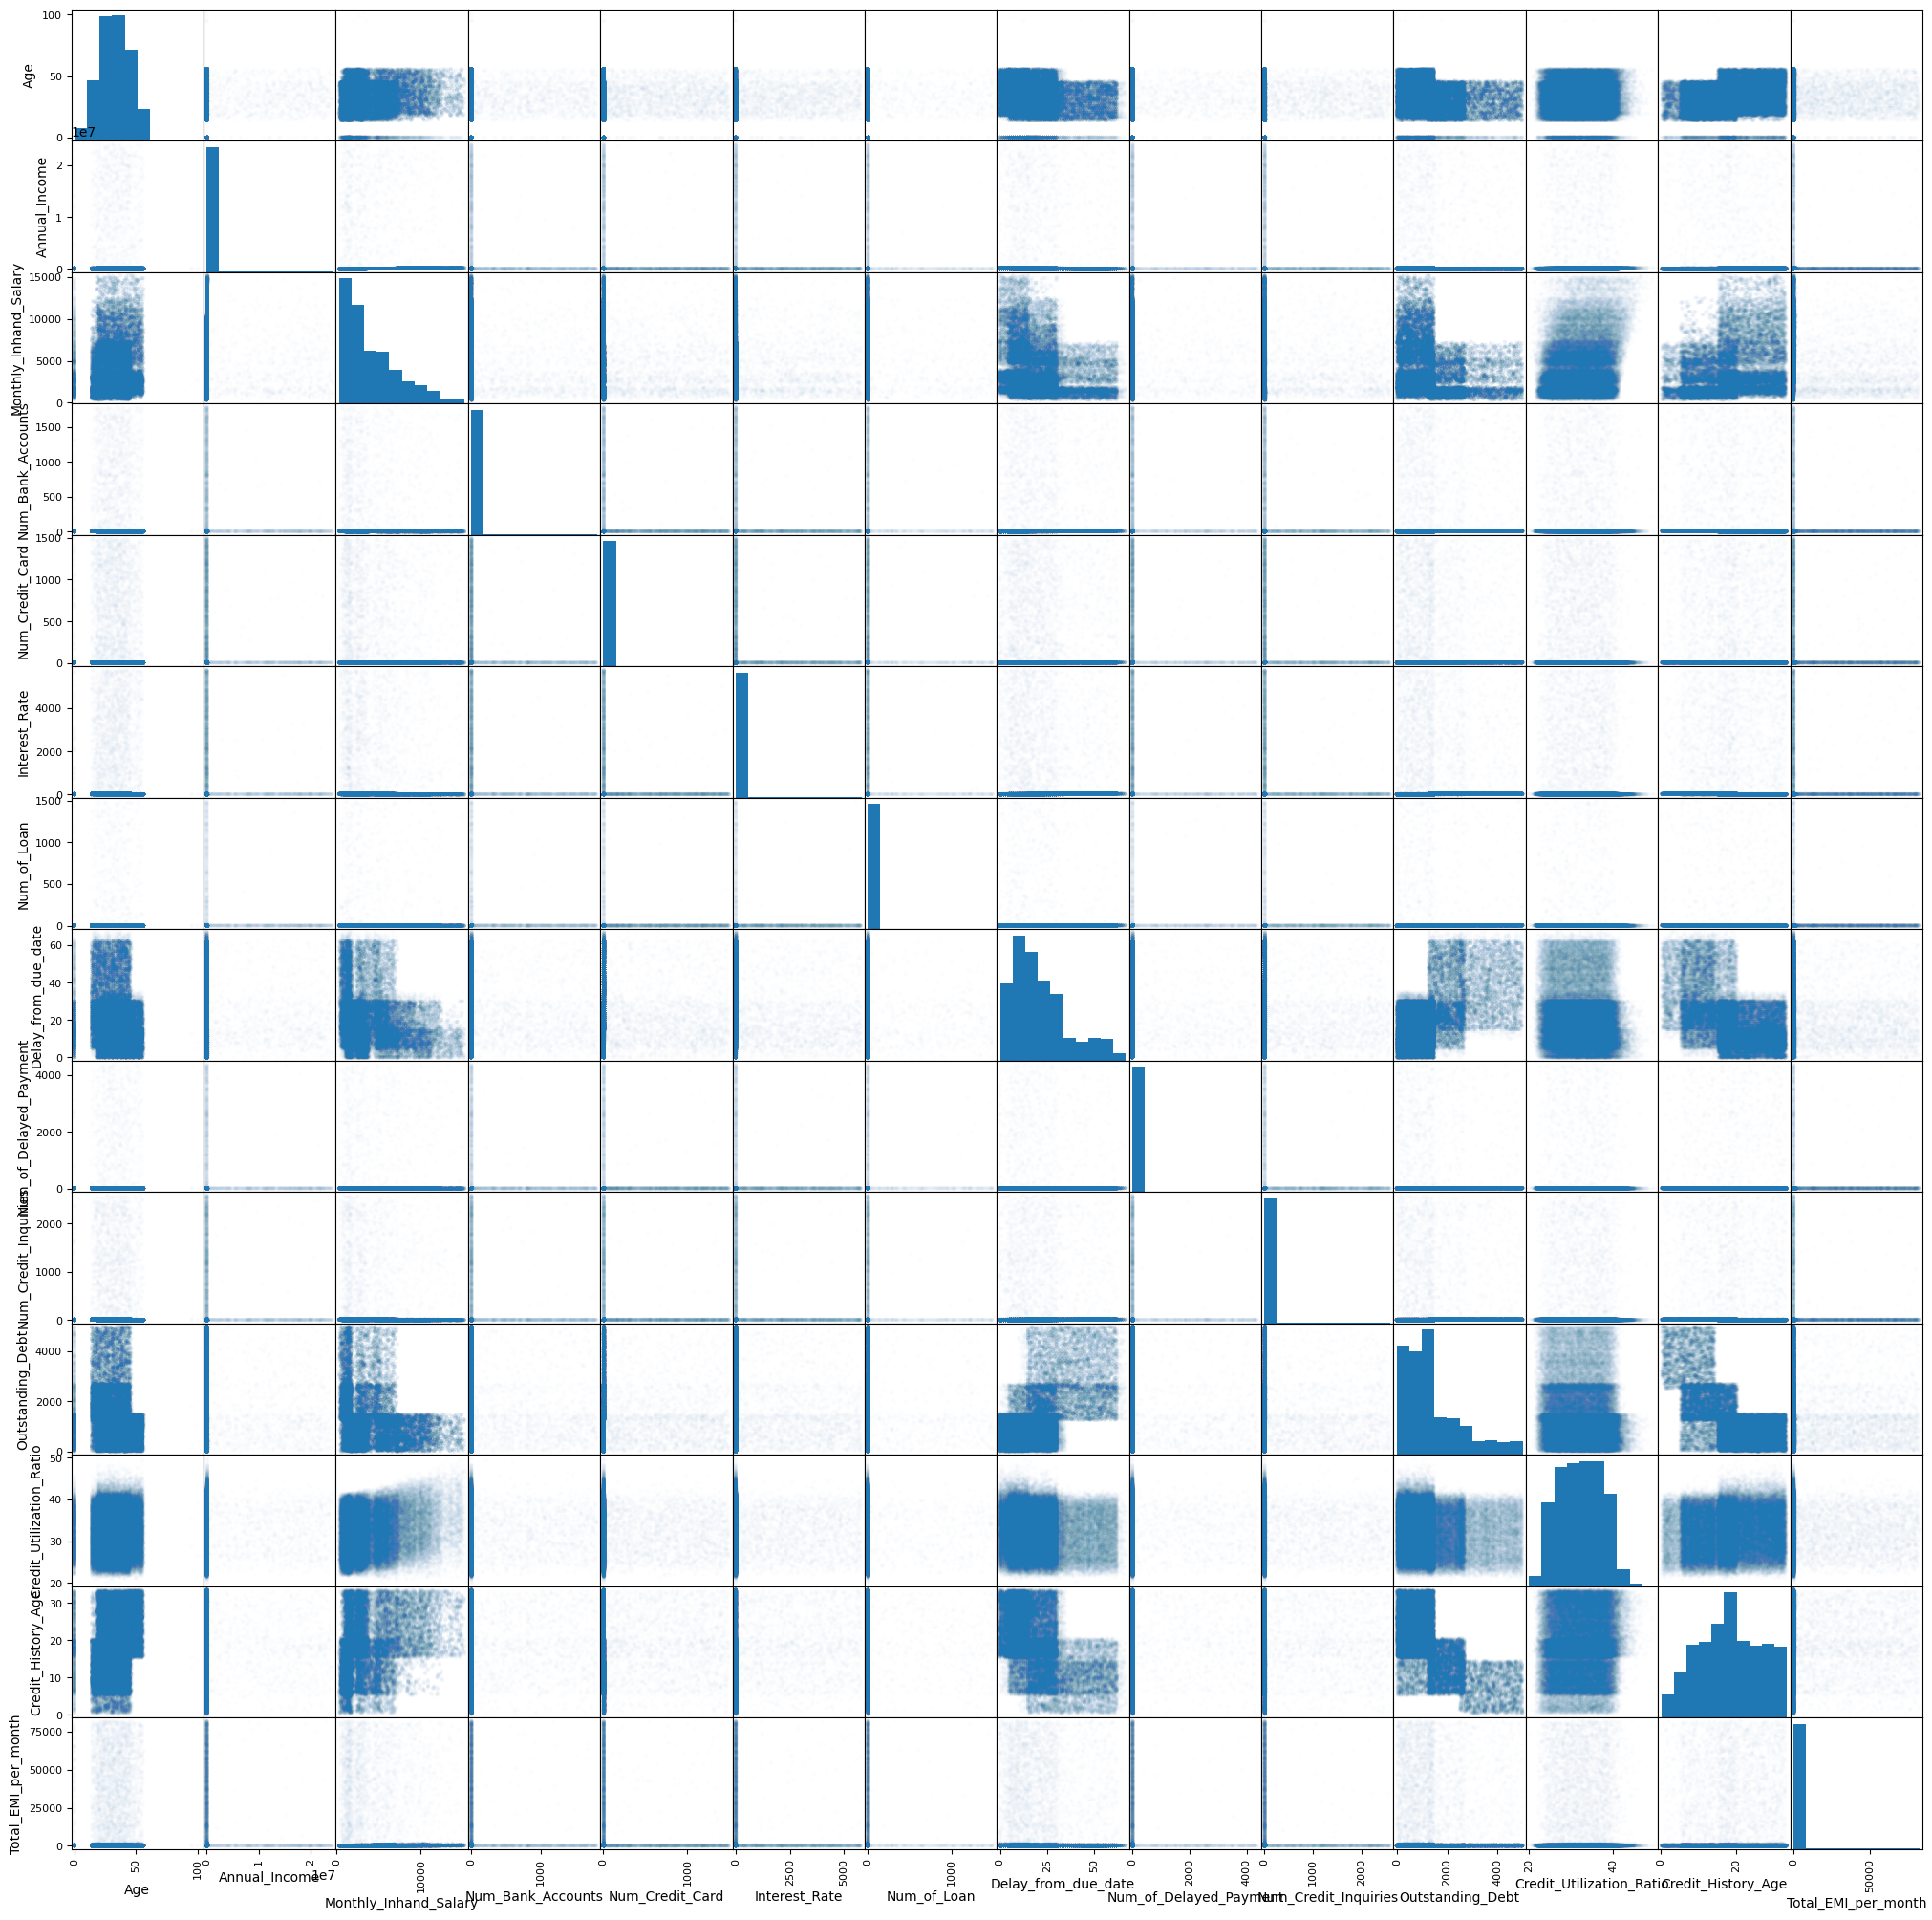

In [7]:
scatter_matrix(data, alpha = .01, figsize = (25, 25))

In [8]:
data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month
count,100000.0,100000.0,84998.0,100000.0,100000.0,100000.0,100000.0,100000.0,92998.0,98035.0,100000.0,100000.0,90970.0,100000.0
mean,32.39924,176415.701298,4194.17085,17.09149,22.47443,72.46604,6.88596,21.08191,30.934805,27.754251,1426.220376,32.285173,18.43295,1403.118217
std,11.956919,1429618.051414,3183.686167,117.404803,129.05741,466.422621,59.150621,14.840204,226.030273,193.177339,1155.129026,5.116875,8.31178,8306.04127
min,0.0,7005.93,303.645417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.23,20.0,0.083333,0.0
25%,24.0,19457.5,1625.568229,3.0,4.0,8.0,1.0,10.0,9.0,3.0,566.0725,28.052567,12.0,30.30666
50%,32.0,37578.61,3093.745,6.0,5.0,13.0,3.0,18.0,14.0,6.0,1166.155,32.305784,18.25,69.249473
75%,41.0,72790.92,5957.448333,7.0,7.0,20.0,5.0,28.0,18.0,9.0,1945.9625,36.496663,25.166667,161.224249
max,102.0,24198062.0,15204.633333,1798.0,1499.0,5797.0,1496.0,67.0,4397.0,2597.0,4998.07,50.0,33.666667,82331.0


In [9]:
data.select_dtypes(include=[float, int]).corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month
Age,1.000000,0.006465,0.078506,0.000525,-0.005710,-0.000492,-0.010606,-0.149953,0.000296,-0.003852,-0.177000,0.021663,0.206411,-0.001258
Annual_Income,0.006465,1.000000,0.030519,-0.004625,0.001250,-0.002908,0.001417,-0.010651,0.001183,0.003153,-0.003706,0.010316,-0.002110,-0.000248
Monthly_Inhand_Salary,0.078506,0.030519,1.000000,-0.010817,-0.005049,-0.006422,-0.011554,-0.249989,0.000944,-0.008867,-0.269727,0.173192,0.273883,0.007264
Num_Bank_Accounts,0.000525,-0.004625,-0.010817,1.000000,-0.002216,-0.003998,-0.000740,0.015943,-0.003619,-0.001684,0.015547,-0.001364,-0.010408,-0.001433
Num_Credit_Card,-0.005710,0.001250,-0.005049,-0.002216,1.000000,-0.004012,0.000860,0.008773,0.004875,-0.003479,0.005626,-0.003341,-0.005939,0.000768
Interest_Rate,-0.000492,-0.002908,-0.006422,-0.003998,-0.004012,1.000000,0.001088,0.009808,0.002666,-0.001681,0.010721,-0.000359,-0.009857,0.002517
Num_of_Loan,-0.010606,0.001417,-0.011554,-0.000740,0.000860,0.001088,1.000000,0.013080,0.009344,-0.000387,0.024154,-0.005307,-0.024866,0.000416
Delay_from_due_date,-0.149953,-0.010651,-0.249989,0.015943,0.008773,0.009808,0.013080,1.000000,0.012766,0.011557,0.571898,-0.063840,-0.492293,-0.003908
Num_of_Delayed_Payment,0.000296,0.001183,0.000944,-0.003619,0.004875,0.002666,0.009344,0.012766,1.000000,0.002836,0.010091,0.000868,-0.008178,0.001120
Num_Credit_Inquiries,-0.003852,0.003153,-0.008867,-0.001684,-0.003479,-0.001681,-0.000387,0.011557,0.002836,1.000000,0.013387,0.000145,-0.014494,-0.007031


In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'string']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'string']
int_columns         = [c for c in data.columns if data[c].dtype.name == 'Int64']
float_columns       = [c for c in data.columns if data[c].dtype.name == 'Float64']
print(categorical_columns)
print(numerical_columns)
print(int_columns)
print(float_columns)

['Month', 'Occupation', 'Type_of_Loan', 'Changed_Credit_Limit', 'Credit_Mix', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month']
['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment']
['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month']


In [11]:
# некоторая обработка численных признаков перед категоризацией

for float_column in float_columns:
  data[float_column] = data[float_column].fillna(data[float_column].mean())

for int_column in int_columns:
  data[int_column] = data[int_column].fillna(int(data[int_column].mean())).astype('Int64')

data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].astype('Int64')

In [12]:
# обработка категориальных признаков

for categorical_column in categorical_columns:
  data[categorical_column] = data[categorical_column].fillna('_')
  unique, counts = np.unique(data[categorical_column][data[categorical_column] != '_'], return_counts=True)
  most_common_value = unique[np.argmax(counts)]
  data[categorical_column][data[categorical_column] == '_'] = most_common_value

category_mapping = {}

for categorical_column in categorical_columns:
    data[categorical_column] = pd.Categorical(data[categorical_column])
    category_mapping[categorical_column] = dict(enumerate(data[categorical_column].cat.categories))
    data[categorical_column] = data[categorical_column].cat.codes

In [13]:
# нормализация

data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

data_categorical = pd.get_dummies(data[categorical_columns])

data = pd.concat((data_numerical, data_categorical), axis = 1)

In [14]:
# X и y

X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']
feature_names = X.columns

X = X.to_numpy()
y = y.to_numpy()

In [15]:
print(X.shape, y.shape)

(100000, 23) (100000,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape
N, d = X.shape

print(N_train, N_test)

70000 30000


In [17]:
# Для решения задачи классификации кредитных рейтингов был выбран алгоритм Random Forest,
# поскольку он продемонстрировал наилучшие результаты по сравнению с рядом других методов,
# включая K-ближайшие соседи (KNN), метод опорных векторов (SVC), Extremely Randomized Trees, AdaBoost и Gradient Boosting Trees (GBT).

from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 2000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.22033333333333333


In [18]:
np.sum(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Outstanding_Debt' (0.111099)
 2. feature 'Interest_Rate' (0.077478)
 3. feature 'Delay_from_due_date' (0.060131)
 4. feature 'Credit_History_Age' (0.053548)
 5. feature 'Credit_Mix' (0.051823)
 6. feature 'Changed_Credit_Limit' (0.048960)
 7. feature 'Monthly_Balance' (0.042577)
 8. feature 'Num_Credit_Card' (0.042343)
 9. feature 'Num_Credit_Inquiries' (0.042237)
10. feature 'Credit_Utilization_Ratio' (0.041847)
11. feature 'Annual_Income' (0.041685)
12. feature 'Num_of_Delayed_Payment' (0.040496)
13. feature 'Total_EMI_per_month' (0.040095)
14. feature 'Amount_invested_monthly' (0.039582)
15. feature 'Monthly_Inhand_Salary' (0.038206)
16. feature 'Type_of_Loan' (0.037252)
17. feature '  Age' (0.035595)
18. feature 'Num_Bank_Accounts' (0.035040)
19. feature 'Occupation' (0.027767)
20. feature 'Month' (0.025988)
21. feature 'Num_of_Loan' (0.024548)
22. feature 'Payment_of_Min_Amount' (0.020886)
23. feature 'Payment_Behaviour' (0.020818)


(-1.0, 20.0)

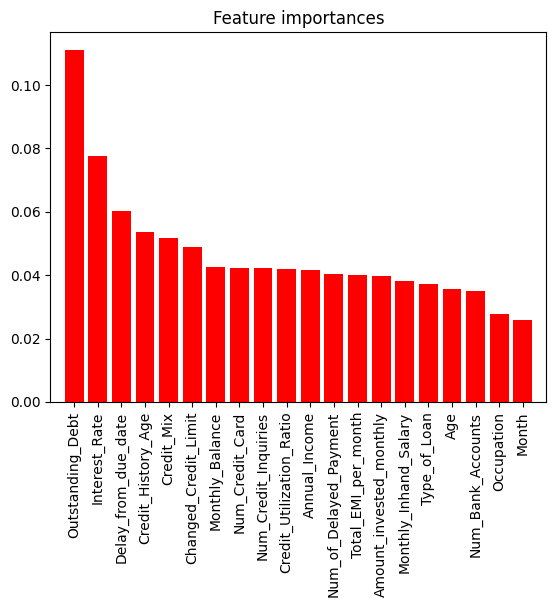

In [19]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

In [20]:

# На основе представленной диаграммы можно сделать значимые выводы о влиянии различных факторов на кредитный рейтинг
# клиентов. Особенно заметно, что размер непогашенного долга и процентная ставка по кредитной карте оказывают
# наибольшее влияние на данный показатель. Эти два параметра выступают в качестве ключевых индикаторов
# финансового здоровья клиентов и, следовательно, их кредитоспособности.
# Чем выше этот долг, тем больше рисков для кредиторов, что, в свою очередь, негативно сказывается на кредитном рейтинге.
# Аналогично, процентная ставка по кредитной карте может отражать уровень кредитного риска, связанного с конкретным клиентом.
# Высокие ставки могут сигнализировать о том, что заемщик имеет низкий кредитный рейтинг или недостаточную финансовую дисциплину.

In [21]:
# Кластеризация

In [22]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score

In [23]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_encoded = label_encoder.fit_transform(y_train)

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=1000)
dbscan.fit(X_train)

DBSCAN(min_samples=1000)

In [26]:
optics = OPTICS(eps=0.5, min_samples=1000)
optics.fit(X_train)

OPTICS(eps=0.5, min_samples=1000)

In [27]:
train_clusters_kmeans = kmeans.predict(X_train)
test_clusters_kmeans = kmeans.predict(X_test)

train_clusters_dbscan = dbscan.labels_
#test_clusters_dbscan = dbscan.predict(X_test)

train_clusters_optics = optics.labels_
#test_clusters_optics = optics.predict(X_test)

In [28]:
def map_clusters_to_classes(clusters, true_labels):
    cluster_labels = np.zeros_like(clusters)
    for cluster in np.unique(clusters):
        mask = clusters == cluster
        most_common_label = mode(true_labels[mask], keepdims=True).mode[0]
        cluster_labels[mask] = most_common_label
    return cluster_labels

In [29]:
test_clusters_kmeans = map_clusters_to_classes(test_clusters_kmeans, y_test_encoded)

kmeans_error = np.mean(test_clusters_kmeans != y_test_encoded)
print("Ошибка: ", kmeans_error)

accuracy_kmeans = accuracy_score(y_test_encoded, test_clusters_kmeans)
print("Точность: ", accuracy_kmeans)

cm = confusion_matrix(y_test_encoded, test_clusters_kmeans)
print("Confusion Matrix:")
print(cm)


Ошибка:  0.4709
Точность:  0.5291
Confusion Matrix:
[[    0     0  5322]
 [    0     0  8805]
 [    0     0 15873]]


In [30]:
train_clusters_dbscan = map_clusters_to_classes(train_clusters_dbscan, y_train_encoded)

dbscan_error = np.mean(train_clusters_dbscan != y_train_encoded)
print("Ошибка: ", dbscan_error)

accuracy_dbscan = accuracy_score(y_train_encoded, train_clusters_dbscan)
print("Точность: ", accuracy_dbscan)

cm = confusion_matrix(y_train_encoded, train_clusters_dbscan)
print("Confusion Matrix:")
print(cm)

Ошибка:  0.46712857142857145
Точность:  0.5328714285714286
Confusion Matrix:
[[    0     0 12506]
 [    0     0 20193]
 [    0     0 37301]]


In [31]:
train_clusters_optics = map_clusters_to_classes(train_clusters_optics, y_train_encoded)

optics_error = np.mean(train_clusters_optics != y_train_encoded)
print("Ошибка: ", optics_error)

accuracy_optics = accuracy_score(y_train_encoded, train_clusters_optics)
print("Точность: ", accuracy_optics)

cm = confusion_matrix(y_train_encoded, train_clusters_optics)
print("Confusion Matrix:")
print(cm)


Ошибка:  0.46712857142857145
Точность:  0.5328714285714286
Confusion Matrix:
[[    0     0 12506]
 [    0     0 20193]
 [    0     0 37301]]


In [32]:
# Низкая точность кластеризации KMeans, DBSCAN и OPTICS, что данные сложны для разбиения. Это также показывает плохая работа метода ближайших соседей для классификации (из-за чего был ввыбран Random Forest)
# Возможные причины:
# Признаки недостаточно хорошо разделяют данные.
# Некоторые признаки могут быть слабо связаны с целевым классом.
# Данные содержат большое количество признаков, что может усложнять их анализ для плотностных и линейных методов.
# Структура данных сложна и плохо подходит для традиционных методов кластеризации.

# Одним из способов улучшения результатов кластеризации могло бы стать уменьшение количества признаков.
# В процессе анализа данных было выявлено, что некоторые признаки, такие как сумма непогашенного долга и
# процентная ставка по кредитной карте, оказывают значительно большее влияние на кредитный рейтинг клиентов по сравнению с другими.
# Это указывает на то, что не все признаки одинаково важны для решения задачи, и многие из них могут быть нерелевантны или слабо связаны с целевой переменной.
# Удаление низкоинформативных признаков или применение методов отбора признаков, могло бы не только снизить шум в данных,
# но и упростить их структуру, что, в свою очередь, могло бы повысить точность кластеризации. Кроме того, уменьшение размерности данных способствовало бы более эффективной работе методов,
# особенно плотностных, таких как DBSCAN и OPTICS, которые чувствительны к высокоразмерным пространствам.